In [1]:
import pandas as pd
import numpy as np
data1 = pd.read_csv(r'C:\Users\daniel\Documents\Data\P79201907020001.dist.gpsimp.txt', sep="|", header='infer')

In [2]:
data1 = data1.iloc[:, 1:4] 
data1 = data1.rename(columns={data1.columns[1]:'Latitude',data1.columns[2]:'Longitude'})

In [3]:
data1

,Tid [s],Latitude,Longitude
0,28.02467,55.656870,12.319788
1,28.39464,55.656942,12.319690
2,28.76135,55.657013,12.319592
3,29.12875,55.657085,12.319495
4,29.49680,55.657157,12.319399
...,...,...,...
859,344.18011,55.721935,12.366408
860,344.58316,55.722019,12.366466
861,344.98592,55.722102,12.366525
862,345.38899,55.722185,12.366586


In [4]:
data2 = pd.read_csv(r'C:\Users\daniel\Documents\Data\P79201907020001.dist.vm.txt', sep="|", header='infer')

In [5]:
data2.head()

,Distance [m],Hastighed [m/s],Acceleration [m/s²]
0,0.0,27.303578,-0.125773
1,10.0,27.255928,-0.120413
2,20.0,27.214673,-0.107774
3,30.0,27.178512,-0.112690
4,40.0,27.133263,-0.125825


In [6]:
data2.columns

Index(['Distance [m]', ' Hastighed [m/s]', ' Acceleration [m/s²]'], dtype='object')

In [7]:
result = pd.concat([data1, data2], axis=1, sort=False)
Datas=result
result.columns

Index([' Tid [s]', 'Latitude', 'Longitude', 'Distance [m]', ' Hastighed [m/s]',
       ' Acceleration [m/s²]'],
      dtype='object')

In [8]:
result[u'Δt (s)'] =result[' Tid [s]'].diff()
delta=result[u'Δt (s)']
delta=delta.fillna(0)
result['Time']=delta.cumsum()
delta = pd.DataFrame(data=delta)
delta=delta.apply(np.roll, shift=-1)
result[u'Δt (s)']=delta
result

,Tid [s],Latitude,Longitude,Distance [m],Hastighed [m/s],Acceleration [m/s²],Δt (s),Time
0,28.02467,55.656870,12.319788,0.0,27.303578,-0.125773,0.36997,0.00000
1,28.39464,55.656942,12.319690,10.0,27.255928,-0.120413,0.36671,0.36997
2,28.76135,55.657013,12.319592,20.0,27.214673,-0.107774,0.36740,0.73668
3,29.12875,55.657085,12.319495,30.0,27.178512,-0.112690,0.36805,1.10408
4,29.49680,55.657157,12.319399,40.0,27.133263,-0.125825,0.36836,1.47213
...,...,...,...,...,...,...,...,...
859,344.18011,55.721935,12.366408,8590.0,24.813589,-0.005362,0.40305,316.15544
860,344.58316,55.722019,12.366466,8600.0,24.822759,-0.013531,0.40276,316.55849
861,344.98592,55.722102,12.366525,8610.0,24.805478,-0.093047,0.40307,316.96125
862,345.38899,55.722185,12.366586,8620.0,24.746488,-0.152758,0.40412,317.36432


In [9]:
result['DiffVel_[m/s]']=result[' Hastighed [m/s]'].diff()
result['Acceleration_[m/s²]']= result['DiffVel_[m/s]']/result['Time']
accelere=result['Acceleration_[m/s²]']
accelere = pd.DataFrame(data=accelere)
accelere=accelere.apply(np.roll, shift=-1)
accelere=accelere.fillna(0)
result['Acceleration_[m/s²]']=accelere
result

,Tid [s],Latitude,Longitude,Distance [m],Hastighed [m/s],Acceleration [m/s²],Δt (s),Time,DiffVel_[m/s],Acceleration_[m/s²]
0,28.02467,55.656870,12.319788,0.0,27.303578,-0.125773,0.36997,0.00000,NaN,-0.128794
1,28.39464,55.656942,12.319690,10.0,27.255928,-0.120413,0.36671,0.36997,-0.047650,-0.056001
2,28.76135,55.657013,12.319592,20.0,27.214673,-0.107774,0.36740,0.73668,-0.041255,-0.032752
3,29.12875,55.657085,12.319495,30.0,27.178512,-0.112690,0.36805,1.10408,-0.036161,-0.030738
4,29.49680,55.657157,12.319399,40.0,27.133263,-0.125825,0.36836,1.47213,-0.045250,-0.026853
...,...,...,...,...,...,...,...,...,...,...
859,344.18011,55.721935,12.366408,8590.0,24.813589,-0.005362,0.40305,316.15544,-0.009690,0.000029
860,344.58316,55.722019,12.366466,8600.0,24.822759,-0.013531,0.40276,316.55849,0.009169,-0.000055
861,344.98592,55.722102,12.366525,8610.0,24.805478,-0.093047,0.40307,316.96125,-0.017280,-0.000186
862,345.38899,55.722185,12.366586,8620.0,24.746488,-0.152758,0.40412,317.36432,-0.058990,-0.000102


In [10]:
import pandas as pd
import geojson
import json
from pandas.io.json import json_normalize

def data2geojson(df):
    features = []
    insert_features = lambda X: features.append(
            geojson.Feature(geometry=geojson.Point((X["Longitude"],X["Latitude"])),
                            properties=dict(Time=X[' Tid [s]'],Distance =X["Distance [m]"],Speed=X[" Hastighed [m/s]"],Lat=X[" Acceleration [m/s²]"])))
    df.apply(insert_features, axis=1)
    with open(r"C:\OSGeo4W64\Master_Python\Kalman_Filter.geojson", 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)



data2geojson(result)

In [11]:
import matplotlib.pyplot as plt
from numpy.random import randn
import math

class CarSimulation(object):
    
    def __init__(self, x0=0, velocity=1,
                 measurement_variance=0.0, process_variance=0.0,dt=1.0):
        """ x0 - initial position
            velocity - (+=right, -=left)
            measurement_variance - variance in measurement m^2
            process_variance - variance in process (m/s)^2
        """
        self.x = x0
        self.velocity = velocity
        self.measurement_noise = math.sqrt(measurement_variance)
        self.process_noise = math.sqrt(process_variance)
        self.dt = dt

    def move(self):
        '''Compute new position of the dog assuming `dt` seconds have 
        passed since the last update.'''
        # compute new position based on velocity. Add in some
        # process noise
        velocity = self.velocity + randn() * self.process_noise
        self.velocity=velocity
        self.x += velocity * self.dt
        
    def sense_position(self):
        # simulate measuring the position with noise
        measurement = self.x + randn() * self.measurement_noise
        return measurement
    
    def move_and_sense(self):
        self.move()
        return self.sense_position(), self.velocity

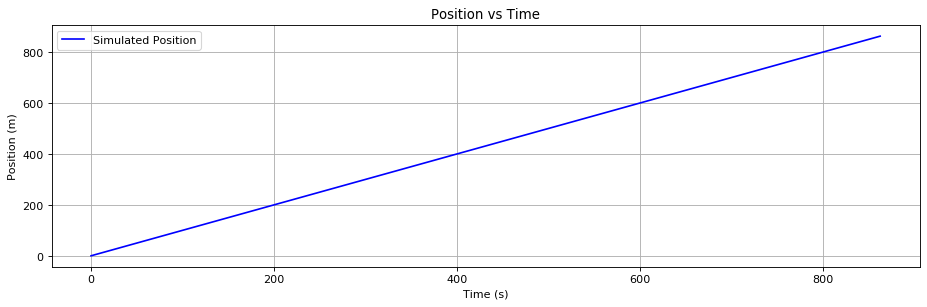

In [12]:
car = CarSimulation(measurement_variance=0.0)
Xs= list()
for idx, val in enumerate(result[' Tid [s]']):
    Xs.append(car.move_and_sense())

Position = [x[0] for x in Xs]
fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
plt.plot(Position, "-b", label="Simulated Position") 
# Add title and axis names
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(loc="upper left")

plt.grid()
plt.show() 

In [13]:
select=result[['Distance [m]','Time',u'Δt (s)',' Hastighed [m/s]']]

In [14]:
Xs=list()
Xs.append((1,0))
Xs[0][0]

1

In [15]:
Xs

[(1, 0)]

865
865


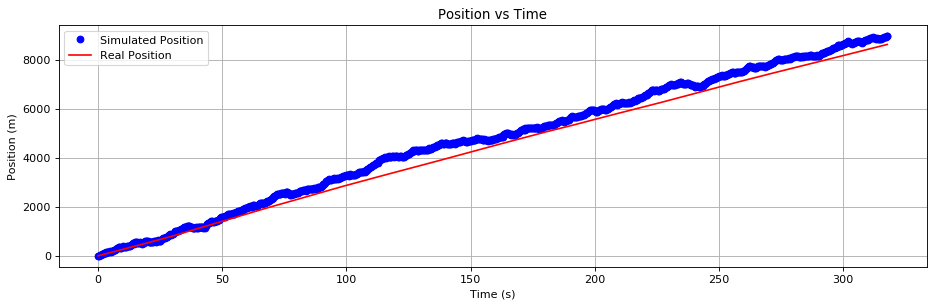

In [16]:
def test_sensor(measurement_var, process_var):
    Xs=list()
    Xs.append((0,0))
    time_delta=0
    Time=[0]
    for idx,dist,time,delta,vel in select.itertuples(index=True):
        car = CarSimulation(measurement_variance=measurement_var, velocity=vel,x0=Xs[idx][0],dt=delta,process_variance=process_var)
        Xs.append(car.move_and_sense())
        time_delta+=delta
        Time.append(time_delta)

    print(len(Xs))
    
    Position = [x[0] for x in Xs]
    print(len(Position))
    fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
    plt.plot(Time,Position,'ob', label="Simulated Position")
    plt.plot(select['Time'],select['Distance [m]'], "-r", label="Real Position")
    # Add title and axis names
    plt.title('Position vs Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.legend(loc="upper left")

    plt.grid()
    
    plt.show() 
    
test_sensor(measurement_var=500,process_var=100)

In [17]:
Xs

[(1, 0)]

In [18]:
def test_sensor(measurement_var, process_var):
    Xs=list()
    Xs.append((0,0))
    time_delta=0
    Time=[0]
    for idx,dist,time,delta,vel in select.itertuples(index=True):
        car = CarSimulation(measurement_variance=measurement_var, velocity=vel,x0=Xs[idx][0],dt=delta,process_variance=process_var)
        Xs.append(car.move_and_sense())
        time_delta+=delta
        Time.append(time_delta)

    return Xs, Time
    
#test_sensor(measurement_var=500,process_var=100)

In [19]:
import filterpy.stats as stats

def multiply(mu1, var1, mu2, var2):
    if var1 == 0.0:
        var1=1.e-80      
    if var2 == 0:
        var2 = 1e-80
        
    mean = (var1*mu2 + var2*mu1) / (var1+var2)
    variance = 1 / (1/var1 + 1/var2)
    return (mean, variance)

In [20]:
from IPython.html.widgets import interact, interactive, fixed
import IPython.html.widgets as widgets
from ipywidgets import FloatSlider

def plot_products(mu_1, mu_2, var_1, var_2):
    xs = np.arange(0, 20, min(var_1, var_2)/10)
    ys = [stats.gaussian(x, mu_1, var_1) for x in xs]
    plt.plot(xs, ys, label='measure 1')

    ys = [stats.gaussian(x, mu_2, var_2) for x in xs]
    plt.plot(xs, ys, label='measure 2')

    mean, var = multiply(mu_1, var_1, mu_2, var_2)
    ys = [stats.gaussian(x, mean, var) for x in xs]
    plt.plot(xs, ys, label='product', ls='--')
    plt.ylim(0, 1.5)
    plt.legend();
    
interact(plot_products,
         mu_1=widgets.FloatSlider(value=5, min=0., max=15), 
         mu_2=widgets.FloatSlider(value=10, min=0., max=15), 
         var_1=widgets.FloatSlider(value=1, min=.1, max=5.), 
         var_2=widgets.FloatSlider(value=1, min=.1, max=5.));

C:\OSGEO4~1\apps\Python37\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(FloatSlider(value=5.0, description='mu_1', max=15.0), FloatSlider(value=10.0, descriptio…

In [21]:
class KalmanFilter1D:
    def __init__(self, x0, P, R, Q):
        self.x = x0
        self.P = P
        self.R = R
        self.Q = Q

    def update(self, z):
        self.x = (self.P * z + self.x * self.R) / (self.P + self.R)
        self.P = 1. / (1./self.P + 1./self.R)

    def predict(self, u=0.0):
        self.x += u
        self.P += self.Q

In [22]:
process_variance=.8
variance=40

In [23]:
kf = KalmanFilter1D(x0=0,               # initial state
                    P=100,              # initial variance 
                                         # large says 'who knows?'
                    R=variance,          # sensor noise
                    Q=process_variance)  # error in prediction

In [24]:
Pos, Time=test_sensor(measurement_var=1000,process_var=100)
desvest_simul=np.full((len(Pos[1:])), np.sqrt(500))

In [25]:
Pos

[(0, 0),
 (21.274003041107505, 27.491780698070706),
 (39.5183267824524, 18.516205942319676),
 (16.480439409063493, 17.056351456575122),
 (47.916280590039605, 20.382337009131817),
 (113.02949862950346, 32.212125316296394),
 (118.15274431732448, 41.588258774810186),
 (106.92892452363154, 32.39079591392091),
 (137.48551102654073, 33.03424068855143),
 (122.86971804105129, 11.574439064662176),
 (83.30216815434193, 15.175488995635),
 (130.9429792074153, 36.848046309286175),
 (189.41960610905102, 44.66295117764827),
 (233.3402395586087, 15.841901695881283),
 (224.70899747070283, 18.60122221125948),
 (289.4837803794435, 48.226311758722886),
 (333.19026292893807, 28.82824297963204),
 (370.32878592036786, 40.292660930441535),
 (303.640827442521, 9.049992139628682),
 (360.15380461124533, 20.149320922204375),
 (360.02098842640333, 32.965296841085916),
 (348.69716007994697, 21.637202549544657),
 (368.924842807433, 49.62593916949382),
 (333.73348646288855, 32.535755850518264),
 (319.6922347560057, 2

In [26]:
positions, variance = [], []
for i in range(len(Pos[1:])):
    kf.predict(result[' Hastighed [m/s]'].loc[0]*result[[u'Δt (s)']].loc[0][0])
    kf.update(Pos[i+1][0])
    
    # save for latter plotting
    positions.append(kf.x)
    variance.append(kf.P)

In [27]:
len(variance)

864

In [28]:
Position = [x[0] for x in Pos]

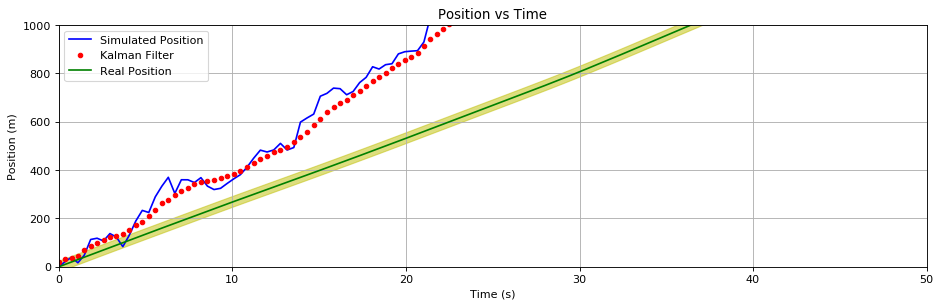

In [29]:
fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
plt.plot(Time,Position,'b', label="Simulated Position",markersize=2)
plt.plot(select['Time'],positions,'or', label="Kalman Filter",markersize=4)
plt.plot(select['Time'],select['Distance [m]'], "-g", label="Real Position")

# Add title and axis names
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(loc="upper left")
plt.fill_between(select['Time'], (select['Distance [m]']-desvest_simul), (select['Distance [m]']+desvest_simul), color='y', alpha=.5)

plt.grid()
plt.axis([0,50,0,1000])
plt.show() 

In [30]:
np.sqrt(variance)

array([5.35129551, 4.1179265 , 3.50683376, 3.14117365, 2.90193778,
       2.73746414, 2.62095239, 2.53682579, 2.4753102 , 2.42993964,
       2.39627572, 2.37119168, 2.35244374, 2.33840041, 2.32786405,
       2.31994945, 2.31399897, 2.30952224, 2.30615259, 2.30361533,
       2.30170429, 2.30026463, 2.29917991, 2.29836252, 2.29774652,
       2.29728226, 2.29693236, 2.29666862, 2.29646983, 2.29631999,
       2.29620704, 2.2961219 , 2.29605772, 2.29600935, 2.29597288,
       2.29594539, 2.29592467, 2.29590905, 2.29589728, 2.2958884 ,
       2.29588171, 2.29587667, 2.29587286, 2.29587   , 2.29586784,
       2.29586621, 2.29586498, 2.29586406, 2.29586336, 2.29586283,
       2.29586244, 2.29586214, 2.29586191, 2.29586174, 2.29586161,
       2.29586152, 2.29586144, 2.29586139, 2.29586135, 2.29586132,
       2.29586129, 2.29586128, 2.29586126, 2.29586125, 2.29586125,
       2.29586124, 2.29586124, 2.29586123, 2.29586123, 2.29586123,
       2.29586123, 2.29586123, 2.29586122, 2.29586122, 2.29586

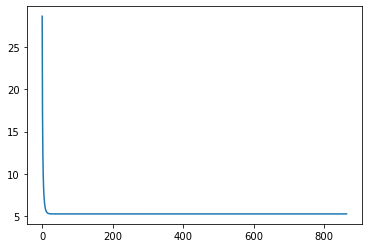

In [31]:
plt.plot(variance)

In [32]:
class KalmanFilter:
    
    from numpy import dot 
    
    def __init__(self, x0, P, F, R, Q, B, U):
        self.x = x0
        self.P = P
        self.R = R
        self.Q = Q
        self.F= F
        self.B= B
        self.U= U
        
    def predict(self,F):
        #Predict the mean of the Next Position
        self.x = dot(F, self.x) + dot(self.B, self.U)
        #Predict the  Covariance Matrix of the next position
        self.P = dot(F, dot(self.P, F.T)) + self.Q 
        
    def update(self,z,H):
        from numpy.linalg import inv 
        #Residual y from the prediction and the new observed value
    
        y = z-dot(H, self.x) 


        #Change or Normalize with matriz H the matrix P and R
        IS = self.R + dot(H, dot(self.P, H.T))
        # Calculate the Kalman Gain
        K = dot(self.P, dot(H.T, inv(IS)))
        #Update Position and Velocity
        self.x = self.x + dot(K, y)
        #Update covariance Matrix
        self.P = dot((np.identity(len(P))  - dot(K, H)),self.P)    

In [33]:
from numpy import dot
import numpy

In [34]:
H = np.array([[1., 0],[ 0, 1.]])

In [35]:
x=np.array([[Pos[0+1][0],result[[' Hastighed [m/s]']].loc[10][0]]]).T

In [36]:
lenM = numpy.shape(H)
print (lenM)

(2, 2)


In [37]:
lenM = numpy.shape(x)
print (lenM)

(2, 1)


In [38]:
z=np.array([[Pos[i+1][0],result[[' Hastighed [m/s]']].loc[i][0]]]).T
z

array([[9150.24718844],
       [  24.71396128]])

In [39]:

x

array([[21.27400304],
       [26.82839216]])

In [40]:
z=np.array([[Pos[i+1][0],result[[' Hastighed [m/s]']].loc[i][0]]])
z.T

array([[9150.24718844],
       [  24.71396128]])

In [41]:
result[[u'Δt (s)']].loc[0][0]

0.3699699999999986

In [42]:
dot(H, x)

array([[21.27400304],
       [26.82839216]])

In [43]:
dt=result[[u'Δt (s)']].loc[0][0]
x = np.array([result[['Distance [m]']].loc[0][0], result[[' Hastighed [m/s]']].loc[0][0]])
P = np.diag([500, 49])
F = np.array([[1, dt], [0, 1]])
from filterpy.common import Q_discrete_white_noise
Q = Q_discrete_white_noise(dim=2, dt=1., var=2.35)
H = np.array([[1., 0.]])
R = np.array([[5.]])


states, covariance = [], []
for i in range(len(Pos[1:])):
    
    if i==0:
        dt=result[[u'Δt (s)']].loc[i][0]
        F = np.array([[1, dt], [0, 1]])
        kf=KalmanFilter(x0=x,P=P,F=F,R=R,Q=Q,B=0,U=0)
        kf.predict(F=F)
        kf.update(Pos[i+1][0], H)
        # save for latter plotting
        states.append(kf.x)
        covariance.append(kf.P)
    
    else:
        dt=result[[u'Δt (s)']].loc[i][0]
        F = np.array([[1, dt], [0, 1]])
 
        kf.predict(F=F)
        kf.update(Pos[i+1][0], H)
        # save for latter plotting
        states.append(kf.x)
        covariance.append(kf.P)
 

In [44]:
from pandas import DataFrame
states= DataFrame (states, columns=['dist','vel'])
states.head()

,dist,vel
0,21.164959,27.724564
1,37.177245,37.054820
2,26.323039,1.638056
3,40.850795,17.893637
4,87.353785,57.962589


In [45]:
Position = [x[0] for x in Pos]

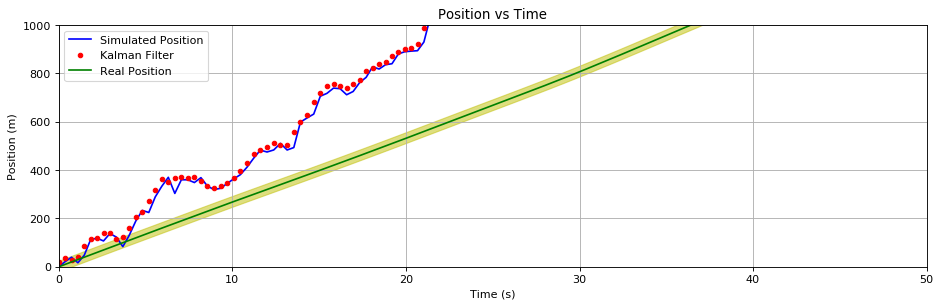

In [46]:
fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
plt.plot(Time,Position,'b', label="Simulated Position",markersize=2)
plt.plot(select['Time'],states['dist'],'or', label="Kalman Filter",markersize=4)
plt.plot(select['Time'],select['Distance [m]'], "-g", label="Real Position")

# Add title and axis names
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(loc="upper left")
plt.fill_between(select['Time'], (select['Distance [m]']-desvest_simul), (select['Distance [m]']+desvest_simul), color='y', alpha=.5)

plt.grid()
plt.axis([0,50,0,1000])
plt.show()

In [47]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

In [48]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [49]:
states['dist']

0        21.164959
1        37.177245
2        26.323039
3        40.850795
4        87.353785
          ...     
859    9145.350060
860    9155.363550
861    9162.042837
862    9166.087576
863    9159.829321
Name: dist, Length: 864, dtype: float64

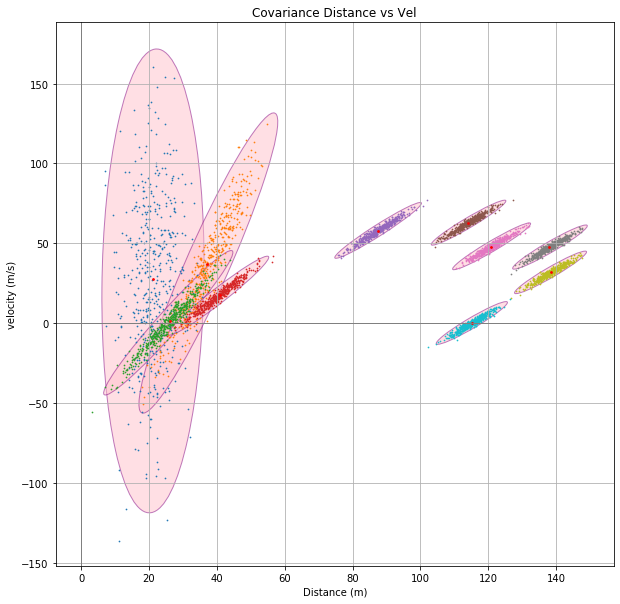

In [50]:
fig, ax_kwargs = plt.subplots(figsize=(10, 10))

for i in range(10):
    
    dependency_kwargs = covariance[i]
    mu = states['dist'][i], states['vel'][i]
    scale = 1, 1

    ax_kwargs.axvline(c='grey', lw=1)
    ax_kwargs.axhline(c='grey', lw=1)


    x, y = get_correlated_dataset(500, dependency_kwargs, mu, scale)
    # Plot the ellipse with zorder=0 in order to demonstrate
    # its transparency (caused by the use of alpha).
    confidence_ellipse(x, y, ax_kwargs,
                       alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

    ax_kwargs.scatter(x, y, s=0.5)
    ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)

ax_kwargs.set_title('Covariance Distance vs Vel')
ax_kwargs.grid()
plt.xlabel('Distance (m)')
plt.ylabel('velocity (m/s)')


fig.subplots_adjust(hspace=0.25)
plt.show()

In [51]:
kf.U=2
kf.U

2

In [52]:
dt=result[[u'Δt (s)']].loc[0][0]
x = np.array([result[['Distance [m]']].loc[0][0], result[[' Hastighed [m/s]']].loc[0][0]])
P = np.diag([500, 49])
F = np.array([[1, dt], [0, 1]])
from filterpy.common import Q_discrete_white_noise

H = np.array([[1., 0]])
R = np.array([[5.]])
print(Q)


states, covariance = [], []
for i in range(len(Pos[1:])):
    
    if i==0:
        dt=result[[u'Δt (s)']].loc[i][0]
        F = np.array([[1, dt], [0, 1]])
        Q = np.array([[1/3*dt**3, 1/2*dt**2], [1/2*dt**2, dt]])*np.var(result[[' Hastighed [m/s]']])[0]
        kf=KalmanFilter(x0=x,P=P,F=F,R=R,Q=Q,B=0,U=0)
        kf.predict(F=F)

        kf.update(Pos[i+1][0], H)
        # save for latter plotting
        states.append(kf.x)
        covariance.append(kf.P)
    
    else:
        dt=result[[u'Δt (s)']].loc[i][0]
        F = np.array([[1, dt], [0, 1]])
        Q = np.array([[1/3*dt**3, 1/2*dt**2], [1/2*dt**2, dt]])*np.var(result[[' Hastighed [m/s]']])[0]
        kf.Q=Q
        kf.predict(F=F)

        kf.update(Pos[i+1][0], H)

        # save for latter plotting
        states.append(kf.x)
        covariance.append(kf.P)


[[0.5875 1.175 ]
 [1.175  2.35  ]]


In [53]:
Position = [x[0] for x in Pos]

In [54]:
Data1= pd.DataFrame(data=Position,columns=['Position m'])
Data2= pd.DataFrame(data=Time,columns=['Time (secs)'])
Simulation = pd.concat([Data1, Data2], axis=1, sort=False)
Simulation

,Position m,Time (secs)
0,0.000000,0.00000
1,21.274003,0.36997
2,39.518327,0.73668
3,16.480439,1.10408
4,47.916281,1.47213
...,...,...
860,9145.180169,316.55849
861,9133.714490,316.96125
862,9145.100644,317.36432
863,9152.796992,317.76844


In [55]:
Pos

[(0, 0),
 (21.274003041107505, 27.491780698070706),
 (39.5183267824524, 18.516205942319676),
 (16.480439409063493, 17.056351456575122),
 (47.916280590039605, 20.382337009131817),
 (113.02949862950346, 32.212125316296394),
 (118.15274431732448, 41.588258774810186),
 (106.92892452363154, 32.39079591392091),
 (137.48551102654073, 33.03424068855143),
 (122.86971804105129, 11.574439064662176),
 (83.30216815434193, 15.175488995635),
 (130.9429792074153, 36.848046309286175),
 (189.41960610905102, 44.66295117764827),
 (233.3402395586087, 15.841901695881283),
 (224.70899747070283, 18.60122221125948),
 (289.4837803794435, 48.226311758722886),
 (333.19026292893807, 28.82824297963204),
 (370.32878592036786, 40.292660930441535),
 (303.640827442521, 9.049992139628682),
 (360.15380461124533, 20.149320922204375),
 (360.02098842640333, 32.965296841085916),
 (348.69716007994697, 21.637202549544657),
 (368.924842807433, 49.62593916949382),
 (333.73348646288855, 32.535755850518264),
 (319.6922347560057, 2

In [56]:
from pandas import DataFrame
states= DataFrame (states, columns=['dist','vel'])
states.head()

,dist,vel
0,21.164843,27.703080
1,37.071979,36.711907
2,26.727700,2.560193
3,40.758762,17.430844
4,85.566473,53.581049


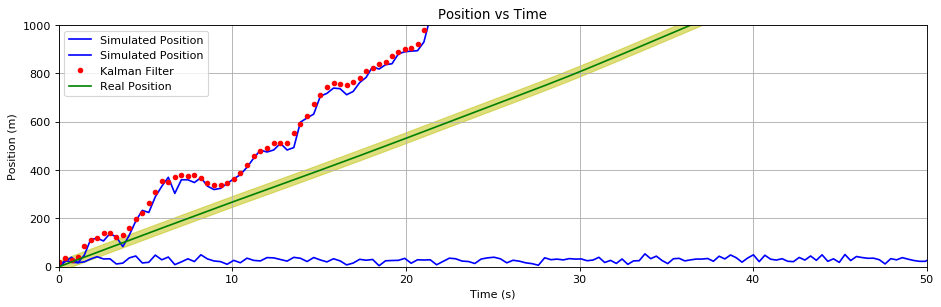

In [57]:
fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
plt.plot(Time,Pos,'b', label="Simulated Position",markersize=2)
plt.plot(select['Time'],states['dist'],'or', label="Kalman Filter",markersize=4)
plt.plot(select['Time'],select['Distance [m]'], "-g", label="Real Position")

# Add title and axis names
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(loc="upper left")
plt.fill_between(select['Time'], (select['Distance [m]']-desvest_simul), (select['Distance [m]']+desvest_simul), color='y', alpha=.5)

plt.grid()
plt.axis([0,50,0,1000])
plt.show()

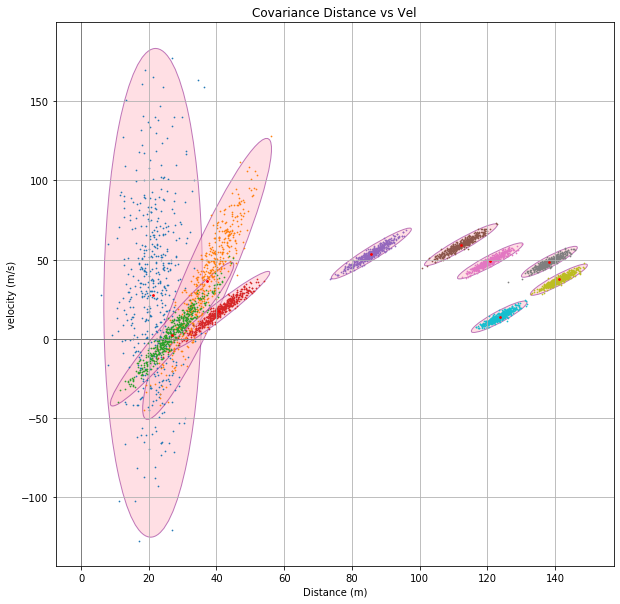

In [58]:
fig, ax_kwargs = plt.subplots(figsize=(10, 10))

for i in range(10):
    
    dependency_kwargs = covariance[i]
    mu = states['dist'][i], states['vel'][i]
    scale = 1, 1

    ax_kwargs.axvline(c='grey', lw=1)
    ax_kwargs.axhline(c='grey', lw=1)


    x, y = get_correlated_dataset(500, dependency_kwargs, mu, scale)
    # Plot the ellipse with zorder=0 in order to demonstrate
    # its transparency (caused by the use of alpha).
    confidence_ellipse(x, y, ax_kwargs,
                       alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

    ax_kwargs.scatter(x, y, s=0.5)
    ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)

ax_kwargs.set_title('Covariance Distance vs Vel')
ax_kwargs.grid()
plt.xlabel('Distance (m)')
plt.ylabel('velocity (m/s)')


fig.subplots_adjust(hspace=0.25)
plt.show()

In [59]:
result.head()

,Tid [s],Latitude,Longitude,Distance [m],Hastighed [m/s],Acceleration [m/s²],Δt (s),Time,DiffVel_[m/s],Acceleration_[m/s²]
0,28.02467,55.656870,12.319788,0.0,27.303578,-0.125773,0.36997,0.00000,NaN,-0.128794
1,28.39464,55.656942,12.319690,10.0,27.255928,-0.120413,0.36671,0.36997,-0.047650,-0.056001
2,28.76135,55.657013,12.319592,20.0,27.214673,-0.107774,0.36740,0.73668,-0.041255,-0.032752
3,29.12875,55.657085,12.319495,30.0,27.178512,-0.112690,0.36805,1.10408,-0.036161,-0.030738
4,29.49680,55.657157,12.319399,40.0,27.133263,-0.125825,0.36836,1.47213,-0.045250,-0.026853


In [60]:
dt=result[[u'Δt (s)']].loc[0][0]
x_t = np.array([[result[['Distance [m]']].loc[0][0], result[[' Hastighed [m/s]']].loc[0][0]]]).T
P = np.diag([500, 49])
B = np.array([[dt**2/2,dt]]).T
from filterpy.common import Q_discrete_white_noise
Q = Q_discrete_white_noise(dim=2, dt=1., var=2.35)
H = np.array([[1., 0.],[0., 1.]])
R = np.array([[5.]])
C = np.identity(2)
ytm=np.array([[Pos[1][0], result[[' Hastighed [m/s]']].loc[1][0]]]).T
y= dot(C, ytm)
print(Q)
var_acc= np.var(result[['Acceleration_[m/s²]']])
var_vel= np.var(result[[' Hastighed [m/s]']])


states, covariance = [], []
for i in range(len(Pos[1:])):
    
    dt=result[[u'Δt (s)']].loc[i][0]
    F = np.array([[1, dt], [0, 1]]) 
    #Q= np.array([[dt**4/4, dt**3/2], [dt**3/2, dt**2]])*var_acc[0]
    Q= np.array([[dt**4/4, dt**3/2], [dt**3/2, dt**2]])*var_vel[0]
    u_t = result[['Acceleration_[m/s²]']].loc[i][0]
    
    
    if i==0:
        kf=KalmanFilter(x0=x_t,P=P,F=F,R=R,Q=Q,B=B,U=u_t)
        kf.predict(F=F) 
        
        kf.update(y, H)

        # save for latter plotting
        states.append(kf.x)
        covariance.append(kf.P)
    
    else:
        ytm=np.array([[Pos[i+1][0], result[[' Hastighed [m/s]']].loc[i][0]]]).T
        y= dot(C, ytm)
        kf.U=u_t
        kf.Q=Q
        kf.predict(F=F) 

        kf.update(y, H)
        # save for latter plotting
        states.append(kf.x)
        covariance.append(kf.P)


[[0.5875 1.175 ]
 [1.175  2.35  ]]


In [61]:
Position = [x[0] for x in Pos]

In [62]:
Kalman_Acceleration_Pos = [x[0] for x in states]
Kalman_Acceleration_Vel = [x[1] for x in states]
uno=pd.DataFrame(Kalman_Acceleration_Pos, columns=['dist'])
dos=pd.DataFrame(Kalman_Acceleration_Vel, columns=['vel'])
states = pd.concat([uno, dos], axis=1, sort=False)
states.head()

,dist,vel
0,21.210142,27.192067
1,48.570642,36.308243
2,2.604243,13.338477
3,47.651233,26.913465
4,130.359984,44.463748


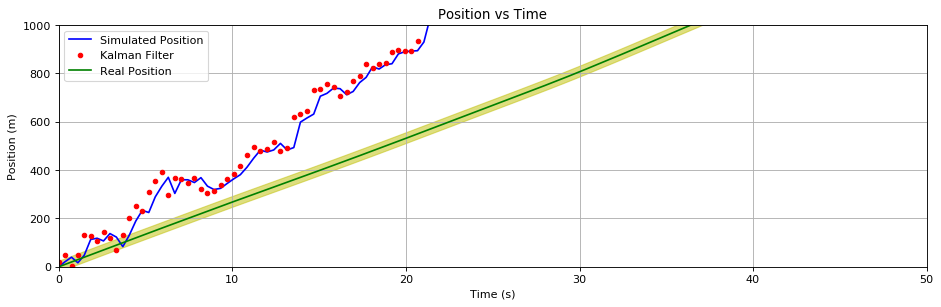

In [63]:
fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
plt.plot(Time,Position,'b', label="Simulated Position",markersize=2)
plt.plot(select['Time'],states['dist'],'or', label="Kalman Filter",markersize=4)
plt.plot(select['Time'],select['Distance [m]'], "-g", label="Real Position")

# Add title and axis names
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(loc="upper left")
plt.fill_between(select['Time'], (select['Distance [m]']-desvest_simul), (select['Distance [m]']+desvest_simul), color='y', alpha=.5)

plt.grid()
plt.axis([0,50,0,1000])
plt.show()

In [64]:
states[:]

,dist,vel
0,21.210142,27.192067
1,48.570642,36.308243
2,2.604243,13.338477
3,47.651233,26.913465
4,130.359984,44.463748
...,...,...
859,9163.728397,43.361818
860,9140.603586,31.711855
861,9150.046412,29.751246
862,9155.560068,27.509564


C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


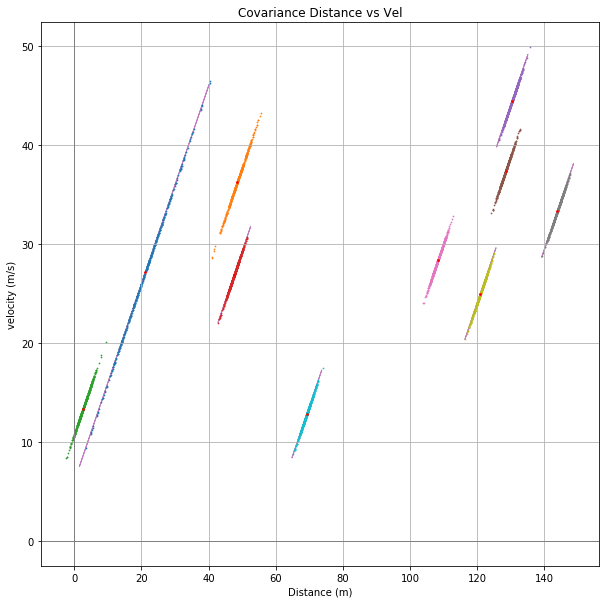

In [65]:
fig, ax_kwargs = plt.subplots(figsize=(10, 10))

for i in range(10):
    
    dependency_kwargs = covariance[i]
    mu = states['dist'][i], states['vel'][i]
    scale = 1, 1

    ax_kwargs.axvline(c='grey', lw=1)
    ax_kwargs.axhline(c='grey', lw=1)


    x, y = get_correlated_dataset(500, dependency_kwargs, mu, scale)
    # Plot the ellipse with zorder=0 in order to demonstrate
    # its transparency (caused by the use of alpha).
    confidence_ellipse(x, y, ax_kwargs,
                       alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

    ax_kwargs.scatter(x, y, s=0.5)
    ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)

ax_kwargs.set_title('Covariance Distance vs Vel')
ax_kwargs.grid()
plt.xlabel('Distance (m)')
plt.ylabel('velocity (m/s)')


fig.subplots_adjust(hspace=0.25)
plt.show()

In [66]:
class CarSimulation2D(object):
    
    def __init__(self, x0=0,y0=0, velocity_x=1,velocity_y=1,
                 measurement_variance=0.0, process_variance=0.0,dt=1.0):
        """ x0 - initial position
            velocity - (+=right, -=left)
            measurement_variance - variance in measurement m^2
            process_variance - variance in process (m/s)^2
        """
        self.x = x0
        self.y = y0
        self.velocity_x = velocity_x
        self.velocity_y = velocity_y
        self.measurement_noise = math.sqrt(measurement_variance)
        self.process_noise = math.sqrt(process_variance)
        self.dt = dt

    def move(self):
        '''Compute new position of the dog assuming `dt` seconds have 
        passed since the last update.'''
        # compute new position based on velocity. Add in some
        # process noise
        velocity_x = self.velocity_x + randn() * self.process_noise
        velocity_y = self.velocity_y + randn() * self.process_noise
        self.x += velocity_x * self.dt
        self.y += velocity_y * self.dt
        
    def sense_position(self):
        # simulate measuring the position with noise
        measurementx = self.x + randn() * self.measurement_noise
        measurementy = self.y + randn() * self.measurement_noise
        return measurementx,measurementy
    
    def move_and_sense(self):
        self.move()
        return self.sense_position()

In [67]:
Datas

,Tid [s],Latitude,Longitude,Distance [m],Hastighed [m/s],Acceleration [m/s²],Δt (s),Time,DiffVel_[m/s],Acceleration_[m/s²]
0,28.02467,55.656870,12.319788,0.0,27.303578,-0.125773,0.36997,0.00000,NaN,-0.128794
1,28.39464,55.656942,12.319690,10.0,27.255928,-0.120413,0.36671,0.36997,-0.047650,-0.056001
2,28.76135,55.657013,12.319592,20.0,27.214673,-0.107774,0.36740,0.73668,-0.041255,-0.032752
3,29.12875,55.657085,12.319495,30.0,27.178512,-0.112690,0.36805,1.10408,-0.036161,-0.030738
4,29.49680,55.657157,12.319399,40.0,27.133263,-0.125825,0.36836,1.47213,-0.045250,-0.026853
...,...,...,...,...,...,...,...,...,...,...
859,344.18011,55.721935,12.366408,8590.0,24.813589,-0.005362,0.40305,316.15544,-0.009690,0.000029
860,344.58316,55.722019,12.366466,8600.0,24.822759,-0.013531,0.40276,316.55849,0.009169,-0.000055
861,344.98592,55.722102,12.366525,8610.0,24.805478,-0.093047,0.40307,316.96125,-0.017280,-0.000186
862,345.38899,55.722185,12.366586,8620.0,24.746488,-0.152758,0.40412,317.36432,-0.058990,-0.000102


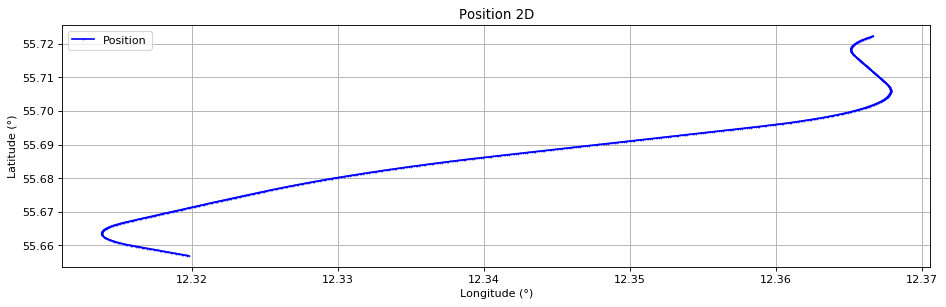

In [68]:
car = CarSimulation(measurement_variance=0.0)
Xs= list()
for idx, val in enumerate(result[' Tid [s]']):
    Xs.append(car.move_and_sense())

fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
plt.plot(result.Longitude,result.Latitude ,"-ob", label="Position",markersize=0.5) 
# Add title and axis names
plt.title('Position 2D')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.legend(loc="upper left")

plt.grid()
plt.show()

In [69]:
from pyproj import Proj
myProj = Proj("+proj=utm +zone=32N, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
result['UTM_X']=""
result['UTM_Y']=""
result['Dist(m)']=""

def distance(x1,x2,y1,y2):
       sq1 = (x1-x2)*(x1-x2)
       sq2 = (y1-y2)*(y1-y2)
       return math.sqrt(sq1 + sq2)
    
    
for contador in range(len(result)):
    UTMx, UTMy = myProj(result['Longitude'].iloc[contador], result['Latitude'].iloc[contador])
    result['UTM_X'].iloc[contador]= UTMx
    result['UTM_Y'].iloc[contador]= UTMy
    result[u'Δt (s)'].iloc[contador]=result[u'Δt (s)'].iloc[contador]

C:\OSGEO4~1\apps\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [70]:
result['UTM_X']= result['UTM_X']-result['UTM_X'][0]
result['UTM_Y']= result['UTM_Y']-result['UTM_Y'][0]

In [71]:
result.head()

,Tid [s],Latitude,Longitude,Distance [m],Hastighed [m/s],Acceleration [m/s²],Δt (s),Time,DiffVel_[m/s],Acceleration_[m/s²],UTM_X,UTM_Y,Dist(m)
0,28.02467,55.656870,12.319788,0.0,27.303578,-0.125773,0.36997,0.00000,NaN,-0.128794,0,0,
1,28.39464,55.656942,12.319690,10.0,27.255928,-0.120413,0.36671,0.36997,-0.047650,-0.056001,-6.59001,7.68484,
2,28.76135,55.657013,12.319592,20.0,27.214673,-0.107774,0.36740,0.73668,-0.041255,-0.032752,-13.1014,15.342,
3,29.12875,55.657085,12.319495,30.0,27.178512,-0.112690,0.36805,1.10408,-0.036161,-0.030738,-19.5793,23.0276,
4,29.49680,55.657157,12.319399,40.0,27.133263,-0.125825,0.36836,1.47213,-0.045250,-0.026853,-25.9871,30.7238,


In [72]:
result[u'ΔUTM_X'] =result['UTM_X'].diff()
result[u'ΔUTM_Y'] =result['UTM_Y'].diff()
result=result.fillna(0)

In [73]:
result

,Tid [s],Latitude,Longitude,Distance [m],Hastighed [m/s],Acceleration [m/s²],Δt (s),Time,DiffVel_[m/s],Acceleration_[m/s²],UTM_X,UTM_Y,Dist(m),ΔUTM_X,ΔUTM_Y
0,28.02467,55.656870,12.319788,0.0,27.303578,-0.125773,0.36997,0.00000,0.000000,-0.128794,0.000000,0.000000,,0.000000,0.000000
1,28.39464,55.656942,12.319690,10.0,27.255928,-0.120413,0.36671,0.36997,-0.047650,-0.056001,-6.590012,7.684839,,-6.590012,7.684839
2,28.76135,55.657013,12.319592,20.0,27.214673,-0.107774,0.36740,0.73668,-0.041255,-0.032752,-13.101408,15.342016,,-6.511396,7.657176
3,29.12875,55.657085,12.319495,30.0,27.178512,-0.112690,0.36805,1.10408,-0.036161,-0.030738,-19.579288,23.027560,,-6.477880,7.685544
4,29.49680,55.657157,12.319399,40.0,27.133263,-0.125825,0.36836,1.47213,-0.045250,-0.026853,-25.987071,30.723827,,-6.407783,7.696267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,344.18011,55.721935,12.366408,8590.0,24.813589,-0.005362,0.40305,316.15544,-0.009690,0.000029,2579.822142,7378.060125,,3.136781,9.558320
860,344.58316,55.722019,12.366466,8600.0,24.822759,-0.013531,0.40276,316.55849,0.009169,-0.000055,2583.015551,7387.537922,,3.193408,9.477797
861,344.98592,55.722102,12.366525,8610.0,24.805478,-0.093047,0.40307,316.96125,-0.017280,-0.000186,2586.274289,7396.977538,,3.258738,9.439615
862,345.38899,55.722185,12.366586,8620.0,24.746488,-0.152758,0.40412,317.36432,-0.058990,-0.000102,2589.659867,7406.376945,,3.385579,9.399407


In [74]:
def angle(delta_x,delta_y):
    myradians = math.atan2(delta_y, delta_x)
    mydegrees = math.degrees(myradians)
    return myradians

In [75]:
def vel_x(vel,angle_rad):
    velx=vel*math.cos(angle_rad)
    return velx
def vel_y(vel,angle_rad):
    vely=vel*math.sin(angle_rad)
    return vely

In [76]:
result[u'Angle'] = result.apply(lambda x: angle(x.ΔUTM_X, x.ΔUTM_Y), axis=1)

In [77]:
result['Velocity']= result[' Hastighed [m/s]']

In [78]:
result[u'Velocity_X'] = result.apply(lambda x: vel_x(x.Velocity, x.Angle), axis=1)
result[u'Velocity_Y'] = result.apply(lambda x: vel_y(x.Velocity, x.Angle), axis=1)

In [79]:
result.head()

,Tid [s],Latitude,Longitude,Distance [m],Hastighed [m/s],Acceleration [m/s²],Δt (s),Time,DiffVel_[m/s],Acceleration_[m/s²],UTM_X,UTM_Y,Dist(m),ΔUTM_X,ΔUTM_Y,Angle,Velocity,Velocity_X,Velocity_Y
0,28.02467,55.656870,12.319788,0.0,27.303578,-0.125773,0.36997,0.00000,0.000000,-0.128794,0.000000,0.000000,,0.000000,0.000000,0.000000,27.303578,27.303578,0.000000
1,28.39464,55.656942,12.319690,10.0,27.255928,-0.120413,0.36671,0.36997,-0.047650,-0.056001,-6.590012,7.684839,,-6.590012,7.684839,2.279648,27.255928,-17.742589,20.690243
2,28.76135,55.657013,12.319592,20.0,27.214673,-0.107774,0.36740,0.73668,-0.041255,-0.032752,-13.101408,15.342016,,-6.511396,7.657176,2.275502,27.214673,-17.629935,20.732193
3,29.12875,55.657085,12.319495,30.0,27.178512,-0.112690,0.36805,1.10408,-0.036161,-0.030738,-19.579288,23.027560,,-6.477880,7.685544,2.271134,27.178512,-17.515893,20.781363
4,29.49680,55.657157,12.319399,40.0,27.133263,-0.125825,0.36836,1.47213,-0.045250,-0.026853,-25.987071,30.723827,,-6.407783,7.696267,2.265092,27.133263,-17.361060,20.852039


In [80]:
result[u'δ'] =result['Angle'].diff()

In [81]:
result

,Tid [s],Latitude,Longitude,Distance [m],Hastighed [m/s],Acceleration [m/s²],Δt (s),Time,DiffVel_[m/s],Acceleration_[m/s²],UTM_X,UTM_Y,Dist(m),ΔUTM_X,ΔUTM_Y,Angle,Velocity,Velocity_X,Velocity_Y,δ
0,28.02467,55.656870,12.319788,0.0,27.303578,-0.125773,0.36997,0.00000,0.000000,-0.128794,0.000000,0.000000,,0.000000,0.000000,0.000000,27.303578,27.303578,0.000000,NaN
1,28.39464,55.656942,12.319690,10.0,27.255928,-0.120413,0.36671,0.36997,-0.047650,-0.056001,-6.590012,7.684839,,-6.590012,7.684839,2.279648,27.255928,-17.742589,20.690243,2.279648
2,28.76135,55.657013,12.319592,20.0,27.214673,-0.107774,0.36740,0.73668,-0.041255,-0.032752,-13.101408,15.342016,,-6.511396,7.657176,2.275502,27.214673,-17.629935,20.732193,-0.004146
3,29.12875,55.657085,12.319495,30.0,27.178512,-0.112690,0.36805,1.10408,-0.036161,-0.030738,-19.579288,23.027560,,-6.477880,7.685544,2.271134,27.178512,-17.515893,20.781363,-0.004369
4,29.49680,55.657157,12.319399,40.0,27.133263,-0.125825,0.36836,1.47213,-0.045250,-0.026853,-25.987071,30.723827,,-6.407783,7.696267,2.265092,27.133263,-17.361060,20.852039,-0.006042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,344.18011,55.721935,12.366408,8590.0,24.813589,-0.005362,0.40305,316.15544,-0.009690,0.000029,2579.822142,7378.060125,,3.136781,9.558320,1.253697,24.813589,7.737160,23.576483,-0.010726
860,344.58316,55.722019,12.366466,8600.0,24.822759,-0.013531,0.40276,316.55849,0.009169,-0.000055,2583.015551,7387.537922,,3.193408,9.477797,1.245807,24.822759,7.925870,23.523391,-0.007890
861,344.98592,55.722102,12.366525,8610.0,24.805478,-0.093047,0.40307,316.96125,-0.017280,-0.000186,2586.274289,7396.977538,,3.258738,9.439615,1.238387,24.805478,8.094564,23.447597,-0.007420
862,345.38899,55.722185,12.366586,8620.0,24.746488,-0.152758,0.40412,317.36432,-0.058990,-0.000102,2589.659867,7406.376945,,3.385579,9.399407,1.225072,24.746488,8.386047,23.282244,-0.013315


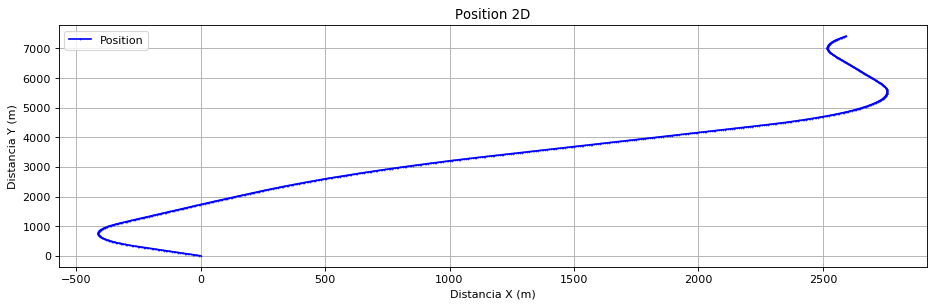

In [82]:
car = CarSimulation(measurement_variance=0.0)
Xs= list()
for idx, val in enumerate(result[' Tid [s]']):
    Xs.append(car.move_and_sense())

fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
plt.plot(result['UTM_X'],result['UTM_Y'] ,"-ob", label="Position",markersize=0.5) 
# Add title and axis names
plt.title('Position 2D')
plt.xlabel('Distancia X (m)')
plt.ylabel('Distancia Y (m)')
plt.legend(loc="upper left")

plt.grid()
plt.show()

In [83]:
select2=result[['UTM_X','UTM_Y','Time',u'Δt (s)',u'Velocity_X',u'Velocity_Y']]

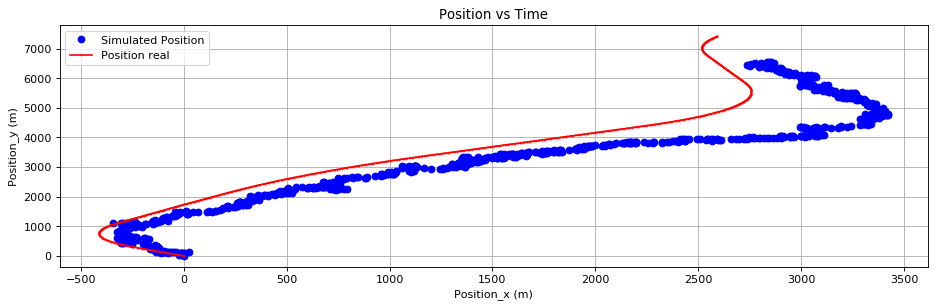

In [84]:
Xs= [0]
Ys= [0]
time_delta=0
Time=[0]
for idx,UTM_X,UTM_Y,time,delta,velx,vely in select2.itertuples(index=True):
    car1 = CarSimulation2D(measurement_variance=400,velocity_x=velx,velocity_y=vely,x0=Xs[idx],y0=Ys[idx],dt=delta,process_variance=0.1)
    x,y= car1.move_and_sense()
    Xs.append(x)
    Ys.append(y)

    time_delta+=delta
    Time.append(time_delta)


fig = plt.figure(num=None, figsize=(14,4 ), dpi=80, facecolor='w', edgecolor='k') 
plt.plot(Xs,Ys,'ob', label="Simulated Position")
plt.plot(result['UTM_X'],result['UTM_Y'] ,"-or", label="Position real",markersize=0.5) 

# Add title and axis names
plt.title('Position vs Time')
plt.xlabel('Position_x (m)')
plt.ylabel('Position_y (m)')
plt.legend(loc="upper left")

plt.grid()
plt.show() 
    


In [94]:
import sympy
from sympy.abc import alpha, x, y, v, w, R, theta, delta, a, L
from sympy import symbols, Matrix
sympy.init_printing(use_latex="mathjax", fontsize='16pt')
time = symbols(u'Δt')
d1 = v*time
d2 = a*1/2*time**2
r = w/sympy.tan(alpha)
fxu = Matrix([[x + d1*sympy.cos(theta+delta) + d2*sympy.cos(theta+delta)],
[y + d1*sympy.sin(theta+delta) + d2*sympy.sin(theta+delta)],
[v+ a*time],
[a],
[theta-d1*sympy.tan(delta)/L],
[delta]])
fxu
F = fxu.jacobian(Matrix([x, y, v,a,theta,delta]))

In [95]:
fxu

⎡    2                                 ⎤
⎢a⋅Δt ⋅cos(δ + θ)                      ⎥
⎢──────────────── + v⋅Δt⋅cos(δ + θ) + x⎥
⎢       2                              ⎥
⎢                                      ⎥
⎢    2                                 ⎥
⎢a⋅Δt ⋅sin(δ + θ)                      ⎥
⎢──────────────── + v⋅Δt⋅sin(δ + θ) + y⎥
⎢       2                              ⎥
⎢                                      ⎥
⎢               a⋅Δt + v               ⎥
⎢                                      ⎥
⎢                  a                   ⎥
⎢                                      ⎥
⎢               v⋅Δt⋅tan(δ)            ⎥
⎢           θ - ───────────            ⎥
⎢                    L                 ⎥
⎢                                      ⎥
⎣                  δ                   ⎦

In [96]:
F

⎡                       2                   2                                 
⎢                     Δt ⋅cos(δ + θ)    a⋅Δt ⋅sin(δ + θ)                      
⎢1  0  Δt⋅cos(δ + θ)  ──────────────  - ──────────────── - v⋅Δt⋅sin(δ + θ)  - 
⎢                           2                  2                              
⎢                                                                             
⎢                       2                  2                                  
⎢                     Δt ⋅sin(δ + θ)   a⋅Δt ⋅cos(δ + θ)                      a
⎢0  1  Δt⋅sin(δ + θ)  ──────────────   ──────────────── + v⋅Δt⋅cos(δ + θ)    ─
⎢                           2                 2                               
⎢                                                                             
⎢0  0        1              Δt                         0                      
⎢                                                                             
⎢0  0        0              1                       

In [ ]:
from filterpy.kalman import ExtendedKalmanFilter as EKF
from numpy import dot, array, sqrt

class Car2DEKF(EKF):
    def __init__(self, dt, wheelbase, std_vel, std_steer):
        EKF.__init__(self, 3, 2, 2)
        self.dt = dt
        self.wheelbase = wheelbase
        self.std_vel = std_vel
        self.std_steer = std_steer
        a, x, y, v, w, theta, time = symbols(
        'a, x, y, v, w, theta, t')
        d = v*time

        beta = (d/w)*sympy.tan(a)
        r = w/sympy.tan(a)
        self.fxu = Matrix(
        [[x-r*sympy.sin(theta)+r*sympy.sin(theta+beta)],
        [y+r*sympy.cos(theta)-r*sympy.cos(theta+beta)],
        [theta+beta]])
        self.F_j = self.fxu.jacobian(Matrix([x, y, theta]))
        self.V_j = self.fxu.jacobian(Matrix([v, a]))
        # save dictionary and it's variables for later use
        self.subs = {x: 0, y: 0, v:0, a:0,
        time:dt, w:wheelbase, theta:0}
        self.x_x, self.x_y, = x, y
        self.v, self.a, self.theta = v, a, theta